## Sales Forecasting 


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score


## Load Dataset

In [28]:
df = pd.read_csv("store-sales-time-series-forecasting/train.csv", parse_dates=["date"])

print("Dataset Shape:", df.shape)
print(df.head())



Dataset Shape: (3000888, 6)
   id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0


## Preprocessing

In [23]:
sales_data = df.groupby("date")["sales"].sum().reset_index()

# Create time-based features
sales_data["year"] = sales_data["date"].dt.year
sales_data["month"] = sales_data["date"].dt.month
sales_data["day"] = sales_data["date"].dt.day
sales_data["dayofweek"] = sales_data["date"].dt.dayofweek

# Create lag features (previous sales)
sales_data["lag_1"] = sales_data["sales"].shift(1)
sales_data["lag_7"] = sales_data["sales"].shift(7)
sales_data["lag_14"] = sales_data["sales"].shift(14)

# Drop missing values caused by lagging
sales_data = sales_data.dropna()

print("\nProcessed Data:")
print(sales_data.head())


Processed Data:
         date          sales  year  month  day  dayofweek          lag_1  \
14 2013-01-15  299129.549954  2013      1   15          1  293348.362078   
15 2013-01-16  318347.913946  2013      1   16          2  299129.549954   
16 2013-01-17  267498.515975  2013      1   17          3  318347.913946   
17 2013-01-18  296130.850028  2013      1   18          4  267498.515975   
18 2013-01-19  432459.852021  2013      1   19          5  296130.850028   

            lag_7         lag_14  
14  318347.777981    2511.618999  
15  302530.809018  496092.417944  
16  258982.003049  361461.231124  
17  289737.685085  354459.677093  
18  403258.212011  477350.121229  


## Train-Test split

In [24]:
X = sales_data[["year", "month", "day", "dayofweek", "lag_1", "lag_7", "lag_14"]]
y = sales_data["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## Train Regresssion Models

In [25]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)



## Model Evaluation

In [29]:
print("\n Model Performance:")

# Linear Regression
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, lr_preds)))
print("Linear Regression R²:", r2_score(y_test, lr_preds))

# Random Forest
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("Random Forest R²:", r2_score(y_test, rf_preds))


 Model Performance:
Linear Regression RMSE: 129325.57077985906
Linear Regression R²: 0.5132011072370994
Random Forest RMSE: 124126.94853328764
Random Forest R²: 0.5515511318885689


## Visualization - Actual vs Predicted Sales

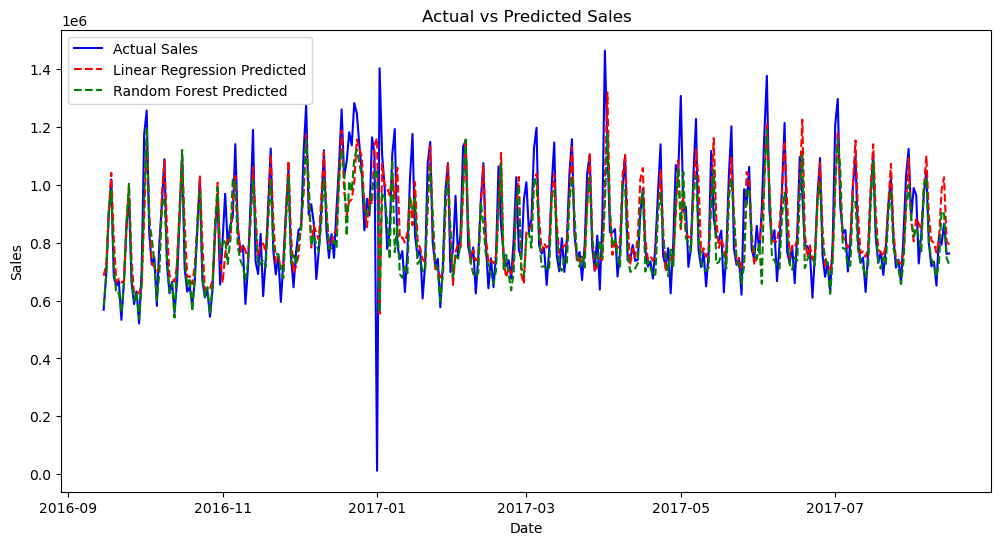

In [30]:
plt.figure(figsize=(12,6))
plt.plot(sales_data["date"].iloc[-len(y_test):], y_test.values, label="Actual Sales", color="blue")
plt.plot(sales_data["date"].iloc[-len(y_test):], lr_preds, label="Linear Regression Predicted", color="red", linestyle="--")
plt.plot(sales_data["date"].iloc[-len(y_test):], rf_preds, label="Random Forest Predicted", color="green", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()